<a href="https://colab.research.google.com/github/ahn283/finance/blob/main/tensorflow_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <b>1. 텐서플로우(Tensorflow) 개요</b>

* Tensorflow는 기계 학습 프레임워크(framework) 중 하나다.
  * Tensorflow에서는 텐서(tensor)를 NumPy 배열처럼 사용할 수 있다.
* Tensorflow를 사용하면, GPU 연동을 통해 효율적으로 딥러닝 모델을 학습할 수 있다.
* Google Colab을 이용하면, 손쉽게 Tensorflow를 시작할 수 있다.
* Google Colab에서는 <b>[런타임]</b> - <b>[런타임 유형 변경]</b>에서 <b>GPU를 선택</b>할 수 있다.

In [1]:
import tensorflow as tf

#### <b>1) GPU 사용 여부 체크하기</b>

* GPU를 사용하면 텐서플로우에서 딥러닝 모델을 더욱 효과적으로 학습할 수 있다.
* 각 텐서(tensor)와 연산이 어떠한 장치에 할당되었는지 출력할 수 있다.

In [2]:
# 각 텐서와 연산이 어떠한 장치에 할당되었는지 출력하기
tf.debugging.set_log_device_placement(True)

a = tf.constant([
    [1, 1],
    [2, 2]
])

b = tf.constant([
    [5, 6],
    [7, 8]
])

c = tf.matmul(a, b)
print(c)

tf.debugging.set_log_device_placement(False)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[12 14]
 [24 28]], shape=(2, 2), dtype=int32)


In [3]:
from tensorflow.python.client import device_lib

# 구체적으로 사용중인 장치(device) 정보 출력
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8239945464548483362
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 40129593344
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14094493884133931498
 physical_device_desc: "device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:00:04.0, compute capability: 8.0"
 xla_global_id: 416903419]

### <b>2. 텐서 소개 및 생성 방법</b>

* TensorFlow에서의 텐서(tensor)는 기능적으로 넘파이(NumPy)와 매우 유사하다.
* 기본적으로 <b>다차원 배열</b>을 처리하기에 적합한 자료구조로 이해할 수 있다.
* TensorFlow의 텐서는 "자동 미분" 기능을 제공한다.

#### <b>1) 텐서의 속성</b>

* 텐서의 <b>기본 속성</b>으로는 다음과 같은 것들이 있다.
  * 모양(shape)
  * 자료형(data type)
  * 저장된 장치

In [4]:
# 기본적인 모양(shape), 자료형(data type) 출력
data = [
    [1, 2],
    [3, 4]
]
x = tf.constant(data)

print(x)
print(tf.rank(x))   # 차원 출력 

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(2, shape=(), dtype=int32)


#### <b>2) 텐서 초기화</b>

* 리스트 데이터에서 직접 텐서를 초기화할 수 있다.

In [5]:
data = [
    [1, 2],
    [3, 4]
]

x = tf.constant(data)
print(x)
print(tf.rank(x))   # 축(axis)의 개수 출력 = 차원의 개수 출력

data = tf.constant('Strng')
print(data)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(b'Strng', shape=(), dtype=string)


* NumPy 배열에서 텐서를 초기화할 수 있다.

In [6]:
a = tf.constant([5])
b = tf.constant([7])

c = (a + b).numpy()
print(c)
print(type(c))

result = c * 10
tensor = tf.convert_to_tensor(result)
print(tensor)
print(type(tensor))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
[12]
<class 'numpy.ndarray'>
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([120], shape=(1,), dtype=int32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


#### <b>3) 다른 텐서로부터 텐서 초기화하기</b>

* 다른 텐서의 정보를 토대로 텐서를 초기화할 수 있다.
* <b>텐서의 속성</b>: 모양(shape), 자료형(data type)

In [7]:
x = tf.constant([
    [5, 7],
    [1, 2]
])

# x와 같은 모양과 자료형을 가지지만, 값은 랜덤으로 채우기
x_rand = tf.random.uniform(shape=x.shape, dtype=tf.float32)   # uniform distribution [0, 1)
print(x_rand)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[0.44931078 0.57978404]
 [0.7820462  0.10833383]], shape=(2, 2), dtype=float32)


### <b>3. 텐서의 형변환 및 차원 조작</b>

* 텐서는 넘파이(NumPy) 배열처럼 조작할 수 있다.

#### <b>1) 텐서의 특정 차원 접근하기</b>

* 텐서의 원하는 차원에 접근할 수 있다.

In [8]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

print(tensor[0])  # first row
print(tensor[:, 0]) # first colmn
print(tensor[..., -1])  # last column

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([1 5 9], shape=(3,), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in 

#### <b>2) 텐서 이어붙이기(Concatenate)</b>

* 두 텐서를 이어 붙여 연결하여 새로운 텐서를 만들 수 있다.

In [9]:
tensor = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

# axis: 텐서를 이어 붙이기 위한 축
# 0번 축(행)을 기준으로 이어 붙이기
result = tf.concat([tensor, tensor, tensor], axis=0)
print(result)

# 1번 축(열)을 기준으로 이어 붙이기
result = tf.concat([tensor, tensor, tensor], axis=1)
print(result)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ConcatV2 in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(9, 4), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ConcatV2 in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[ 1  2  3  4  1  2  3  4  1  2  3  4]
 [ 5  6  7  8  5  6  7  8  5  6  7  8]
 [ 9 10 11 12  9 10 11 12  9 10 11 12]], shape=(3, 12), dtype=int32)


#### <b>3) 텐서 형변환(Type Casting)</b>

* 텐서의 자료형(정수, 실수 등)을 변환할 수 있다.

In [10]:
a = tf.constant([2])
b = tf.constant([5.0])

print(a.dtype)
print(b.dtype)

# tensor a를 float32 형식으로 변경한 뒤에 더하기 수행
print(tf.cast(a, tf.float32) + b)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
<dtype: 'int32'>
<dtype: 'float32'>
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([7.], shape=(1,), dtype=float32)


#### <b>4) 텐서의 모양 변경</b>

* reshape()는 텐서의 모양을 변경할 때 사용한다.
* 이때, 텐서(tensor)의 순서는 변경되지 않는다.

In [11]:
a = tf.Variable([1, 2, 3, 4, 5, 6, 7, 8])
b = tf.reshape(a, (4, 2))
print(b)

# a와 b는 다른 객체
a.assign_add([1, 1, 1, 1, 1, 1, 1, 1])
print(a)
print(b)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1 2]
 [3 4]
 [5 6]
 [7 8]], shape=(4, 2), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignAddVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
<tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>
tf.Tensor(
[[1 2]


#### <b>5) 텐서의 차원 교환</b>

* 하나의 텐서에서 특정한 차원끼리 순서를 교체할 수 있다.

In [12]:
a = tf.random.uniform((64, 32, 3))
print(a.shape)

b = tf.transpose(a, perm=[2, 1, 0]) # 차원 객체를 교환
# (2번째 축, 1번째 축, 0번째 축)의 형태가 되도록 한다.
print(a.shape)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
(64, 32, 3)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Transpose in device /job:localhost/replica:0/task:0/device:GPU:0
(64, 32, 3)


### <b>4. 텐서의 연산과 함수</b>

#### <b>1) 텐서의 연산</b>

* 텐서에 대하여 사칙연산 등 기본적인 연산을 수행할 수 있다.

In [13]:
# 같은 크기를 가진 두 개의 텐서에 대하여 사칙연산 가능
# 기본적으로 요소별(element-wise) 연산
a = tf.constant([
    [1, 2],
    [3, 4]
])
b = tf.constant([
    [5, 6],
    [7, 8]
])

print(a + b)
print(a - b)
print(a * b)
print(a / b)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[ 6  8]
 [10 12]], shape=(2, 2), dtype=int32)
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[-4 -4]
 [-4 -4]], shape=(2, 2), dtype=int32)
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[ 5 12]
 [21 32]], shape=(2, 2), dtype=int32)
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RealDiv in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[0.2        0.33333333]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float64)


* 행렬 곱을 수행할 수 있다.

In [14]:
a = tf.constant([
    [1, 2],
    [3, 4]
])
b = tf.constant([
    [5, 6],
    [7, 8]
])

# 행렬 곱(matrix multiplication) 수행
print(tf.matmul(a, b))

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


#### <b>2) 텐서의 평균 함수</b>

* 텐서의 평균(mean)을 계산할 수 있다.
* 텐서플로우(tensorflow)에서는 차원이 감소한다는 의미로 <b>reduce</b>라는 용어를 사용한다.

In [15]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(a)
print(tf.reduce_mean(a))  # 전체 원소에 대한 평균 (차원이 줄어든다는 점에서 reduce_)
print(tf.reduce_mean(a, axis=0))  # 각 열에 대하여 평균 계산
print(tf.reduce_mean(a, axis=1))  # 각 행에 대하여 평균 계산

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(4, shape=(), dtype=int32)
Executing op Mean in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor([3 4 5 6], shape=(4,), dtype=int32)
Executing op Mean in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor([2 6], shape=(2,), dtype=int32)


#### <b>3) 텐서의 합계 함수</b>

* 텐서의 합계(sum)를 계산할 수 있다.

In [16]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(a)
print(tf.reduce_sum(a)) # 전체 원소에 대한 합계
print(tf.reduce_sum(a, axis=0))   # 각 열에 대하여 합계 계산
print(tf.reduce_sum(a, axis=1))   # 각 행에 대하여 합계 계산

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(36, shape=(), dtype=int32)
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([ 6  8 10 12], shape=(4,), dtype=int32)
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([10 26], shape=(2,), dtype=int32)


#### <b>4) 텐서의 최대 함수</b>

* <b>max() 함수</b>는 원소의 최댓값을 반환한다.
* <b>argmax() 함수</b>는 가장 큰 원소(최댓값)의 인덱스를 반환한다.

In [17]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])

print(a)
print(tf.reduce_max(a))   # 전체 원소에 대한 최대값
print(tf.reduce_max(a, axis=0))   # 각 열게 대하여 최대값 계산
print(tf.reduce_max(a, axis=1))   # 각 행에 대하여 최대값 계산

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(8, shape=(), dtype=int32)
Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
Executing op Max in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor([4 8], shape=(2,), dtype=int32)


#### <b>5) 텐서의 차원 줄이기 혹은 늘리기</b>

* <b>unsqueeze() 함수</b>는  크기가 1인 차원을 추가한다.
  * 배치(batch) 차원을 추가하기 위한 목적으로 흔히 사용된다.
* <b>squeeze() 함수</b>는 크기가 1인 차원을 제거한다.

In [18]:
a = tf.constant([
    [1, 2, 3, 4],
    [5, 6, 7, 8]
])
print(a.shape)

# 첫 번째 축에 차원 추가
a = tf.expand_dims(a, 0)
print(a)
print(a.shape)

# 네 번째 축에 차원 추가
a = tf.expand_dims(a, 3)
print(a)
print(a.shape)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
(2, 4)
Executing op ExpandDims in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[[1 2 3 4]
  [5 6 7 8]]], shape=(1, 2, 4), dtype=int32)
(1, 2, 4)
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ExpandDims in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[[[1]
   [2]
   [3]
   [4]]

  [[5]
   [6]
   [7]
   [8]]]], shape=(1, 2, 4, 1), dtype=int32)
(1, 2, 4, 1)


In [19]:
# 크기가 1인 차원 제거
a = tf.squeeze(a)
print(a)
print(a.shape)

Executing op Squeeze in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1 2 3 4]
 [5 6 7 8]], shape=(2, 4), dtype=int32)
(2, 4)


### <b>5. 자동 미분과 기울기(Gradient)</b>

* TensorFlow에서는 Gradient Tape 기능을 제공한다.
* 이는 "기울기 테이프"라는 의미를 가진다.
* 중간의 관련 연산들을 테이프에 기록하고, 역전파(backward)를 수행했을 때 <b>기울기가 계산</b>된다.

In [20]:
import tensorflow as tf

x = tf.Variable([3.0, 4.0])
y = tf.Variable([1.0, 2.0])

# 진행되는 모든 연산들을 기록
with tf.GradientTape() as tape:
    z = x + y
    loss = tf.math.reduce_mean(z)
  
dx = tape.gradient(loss, x)    # loss가 scaler이므로 계산 가능
print(dx)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /j

* TensorFlow에서는 변수가 아닌 상수라면 기본적으로 기울기를 측정하지 않는다. (not watched)
* 또한, 변수라고 해도 학습 가능하지 않으면 (not trainable) 자동 미분을 사용하지 않는다.

In [21]:
x = tf.linspace(-10, 10, 100)

with tf.GradientTape() as tape:
    tape.watch(x)   # constant이므로, watch() 함수 호출 필요
    y = tf.nn.sigmoid(x)

dx = tape.gradient(y, x)
print(dx)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BroadcastArgs in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BroadcastTo in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BroadcastTo in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ExpandDims in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ExpandDims in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/devi

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /j

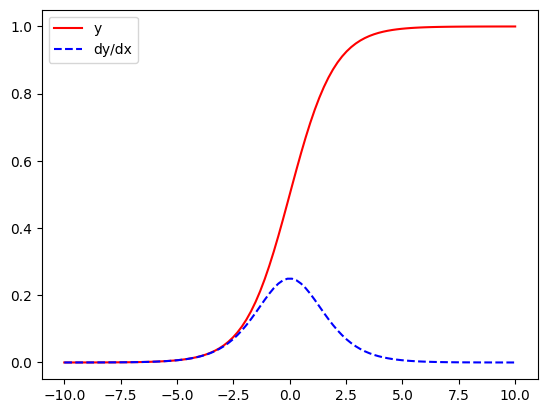

In [22]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'r', label='y')
plt.plot(x, dx, 'b--', label='dy/dx')
plt.legend()
plt.show()